# Machine Learnign (Summer 2017)

## Warm up homework:

#### Plot how the mean square error changes with the polynomial degree ranging between 1 and 30. Do this for the cosine and some other function of your choosing. See what happens if you increase the measurment noise. 

> This is very small so you have one week. You can send the associate, SEPARATE notebook to my e-mail. 
If you still have time, you can do it durring this first class.

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
def mean_squared_error_for(true_fun, features, degrees, n_samples=10000, learn_ratio=0.8, noise_sigma=0.25):
    learn_samples = int(n_samples * learn_ratio)    
    y = true_fun(features) # Target
    
    # Measurment noise
    mu, sigma = 0, 0.25
    for i in range(0, len(x)):
        features[i] += np.random.normal(mu, noise_sigma)    

    data = [features]    

    for _ in degrees:
        data.append(data[-1] * x)
    
    X = np.matrix(data).transpose()
    scaler = StandardScaler()
    scaler.fit(X)

    scores = []
    for i in degrees:
        linear_regresion = LinearRegression()
        linear_regresion.fit(X[:learn_samples,:i], y[:learn_samples])
        scores.append(mean_squared_error(y_true=y[learn_samples:n_samples], y_pred=linear_regresion.predict(X[learn_samples:n_samples,:i])))
        
    return scores

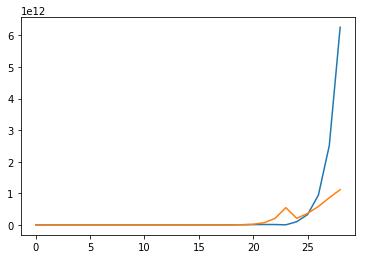

In [84]:
degrees = range(1, 30)
n_samples = 10000
features = np.sort(np.random.uniform(0, 4*(np.pi), n_samples)) # Features

plt.plot(mean_squared_error_for(np.cos, features, degrees, n_samples))
plt.plot(mean_squared_error_for(np.sin, features, degrees, n_samples))
plt.show()